<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>
# The Central Limit Theorem - Rounding Example
*CSCI 3022 - Dirk Grunwald*

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

An accountant wants to simplify bookkeeping by rounding amounts to the nearest integer. We're going to use Chebyshev's inequality and the Central Limit Theorem to compute an upper bound on the probability that $P(\mid X_1 + X_2 + \ldots + X_{100} \mid > 10)$, i.e. the probability of the cummulative rounding error exceeding \$10. 

To study this, we model the rounding errors $ X_i $ by a uniform distribution U(-0.5,0.5). The expectation of $X_i$ is 0, and the variance is $\frac{1}{12}(0.5-(-0.5))^2 = 1/12$ (we'll assume these are givens).

## Using Chebyshev's Inequality

We write $S_n = X_1 + X_2 + \ldots + X_{100}$ and thus $ E[S_n] = E[X_1] + E[X_2] + \ldots + E[X_{100}] = 0$. Because the $X_i$ are independent, then $Var(S_n) = Var(X_1) + Var(X_2) + \ldots + Var(X_{100}) = Var(X_i) * 100 = \frac{1}{12} * 100 = 100/12$. 

We then find from Chebyshev's inequality that:

$$
P(|S| > 10) = P(|S - 0| > 10) \leq \frac{Var(S)}{10^2} = \frac{100/12}{100} = \frac{1}{12}
$$

## Using Central Limit Theorem

$$
\begin{aligned}
P(|S| > 10) =& P(X_1 + X_2 + \ldots + X_{100} < -10)\\ &+ P(X_1 + X_2 + \ldots + X_{100} > 10)
\end{aligned}
$$

Now, compute a *standard normal*

$$
Z_n = \frac{X_1 + X_2 + \ldots + X_{100} - n \mu}{\sigma \sqrt{n}} \\
$$

We do this step by step.
$$
\begin{aligned}
P(S_n > 10) &= P(X_1 + \ldots + X_{100} - n\mu> 10 - n\mu) \\[2ex]
&= P(\frac{X_1 + \ldots + X_{100} - n\mu}{\sigma\sqrt{n}} > \frac{10-n\mu}{\sigma\sqrt{n}}) \\[2ex]
&= P(Z_n > \frac{10-n\mu}{\sigma\sqrt{n}})
\end{aligned}
$$

The $X_i \sim U(-0.5, 0.5)$ so $\mu = 0$ and $\sigma^2 = Var(X_i) = 1/12$.

Plugging these in..

$$
P(Z_n > \frac{10-n\mu}{\sigma\sqrt{n}}) = P(Z_{100} > \frac{10-100*0}{\sqrt{1/12} \sqrt{n}}) = P(Z_{100} > 3.46)
$$

We then use the standard normal distribution to determine $P(Z_{100} > 3.46)$. The CDF of the normal with parameter 3.46 is $P(Z \leq 3.46)$.

In [2]:
norm.cdf(3.46)

0.99972991230603647

And thus, $P(Z_{100} > 3.46) = 1-norm.cdf(3.46)$

In [3]:
1-norm.cdf(3.46)

0.00027008769396352772

We've only calculated $P(S_n > 10)$ and we also need $P(S_n < -10)$, but we can use symmetry to calculate $P(|S_n| > 10)$.

In [4]:
2*(1-norm.cdf(3.46))

0.00054017538792705544

That means that using the CLT, the estimate of $P(\mid S_N \mid > 10)$ changes from 8.3% by the Chebyshev inequality to 0.05%, a 166x difference.

Let's look at this graphically.

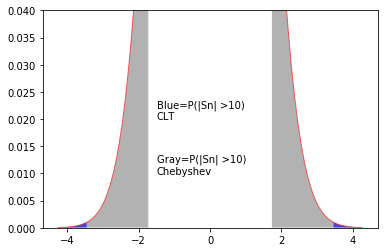

In [5]:
xp = np.linspace(norm.ppf(0.00001),norm.ppf(0.99999), 100)
plt.ylim((0,0.04))
plt.plot(xp, norm.pdf(xp),'r-', lw=1, alpha=0.6, label='norm pdf')
#
# Plot the Chebyshev region - total probabilty is 1/12, probably on
# each tail is thus 1/24. 
#
chebyHalf = (1/12)/2
x2 = np.linspace(norm.ppf(0.00001),norm.ppf(chebyHalf), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='gray', alpha=0.6)
x2 = np.linspace(norm.ppf(1-chebyHalf), norm.ppf(0.99999), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='gray', alpha=0.6)
#
# Plot the CLT region
#
x2 = np.linspace(norm.ppf(0.00001),-3.46, 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
x2 = np.linspace(3.46, norm.ppf(0.99999), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
#
plt.text(-1.5,0.02,"Blue=P(|Sn| >10)\nCLT")
plt.text(-1.5,0.01,"Gray=P(|Sn| >10)\nChebyshev")
plt.show()

## Verifying this using simulation

Let's check this using simulation - we'll draw 10,000 samples of 100 U(-0.5,0.5) uniform random variables summed. We'll then count the ones with an absolute value greater than 10.

First, we create a uniform R.V. beween -0.5 and -0.5+1...

In [6]:
unif_half = sp.stats.uniform(-0.5, 1)

Then, we draw 100 samples, sum them up, do that 10,000 times and take the absolute value of the sums.

In [12]:
Sums = np.abs( np.array( [ np.sum( unif_half.rvs(100)) for x in range(10000) ] ) )

The histogram shows that most of the samples are near zero, with a few outliers.

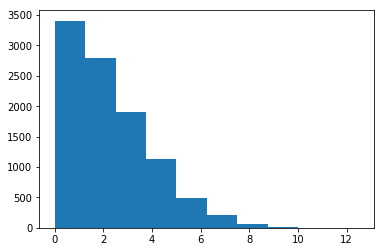

In [8]:
plt.hist(Sums);

The percentage of samples greater than 10 is close to our bound, but will change from sample to sample.  

In [13]:
len(Sums[Sums > 10]) / len(Sums)

0.0004